In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import plotly.express as px
import matplotlib.colors as mcolors
from matplotlib.cm import get_cmap

In [2]:
DATA_DIR = Path('../data/image-matching-challenge-2025')
TRAIN_DIR = DATA_DIR / 'train'
df = pd.read_csv(DATA_DIR / 'train_labels.csv')
datasets_train = df['dataset'].unique()


--- Scenes per Dataset (including 'outliers' as a scene) ---
dataset
ETs                                  3
amy_gardens                          1
fbk_vineyard                         3
imc2023_haiper                       3
imc2023_heritage                     4
imc2023_theather_imc2024_church      2
imc2024_dioscuri_baalshamin          3
imc2024_lizard_pond                  3
pt_brandenburg_british_buckingham    3
pt_piazzasanmarco_grandplace         2
pt_sacrecoeur_trevi_tajmahal         3
pt_stpeters_stpauls                  2
stairs                               2
Name: scene, dtype: int64

--- Statistics on Images per Scene (excluding outliers) ---
count     30.000000
mean      60.766667
std       39.293488
min        9.000000
25%       28.500000
50%       66.500000
75%       75.000000
max      200.000000
Name: image_count, dtype: float64

--- Outlier Images per Dataset ---
dataset
ETs                             3
imc2023_heritage               61
imc2024_dioscuri_baalshamin   

/tmp/ipykernel_1596855/1896183625.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1596855/1896183625.py:39: UserWarning: 
The palette list has fewer values (10) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/tmp/ipykernel_1596855/1896183625.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1596855/1896183625.py:64: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(
/tmp/ipykernel_1596855/1896183625.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set

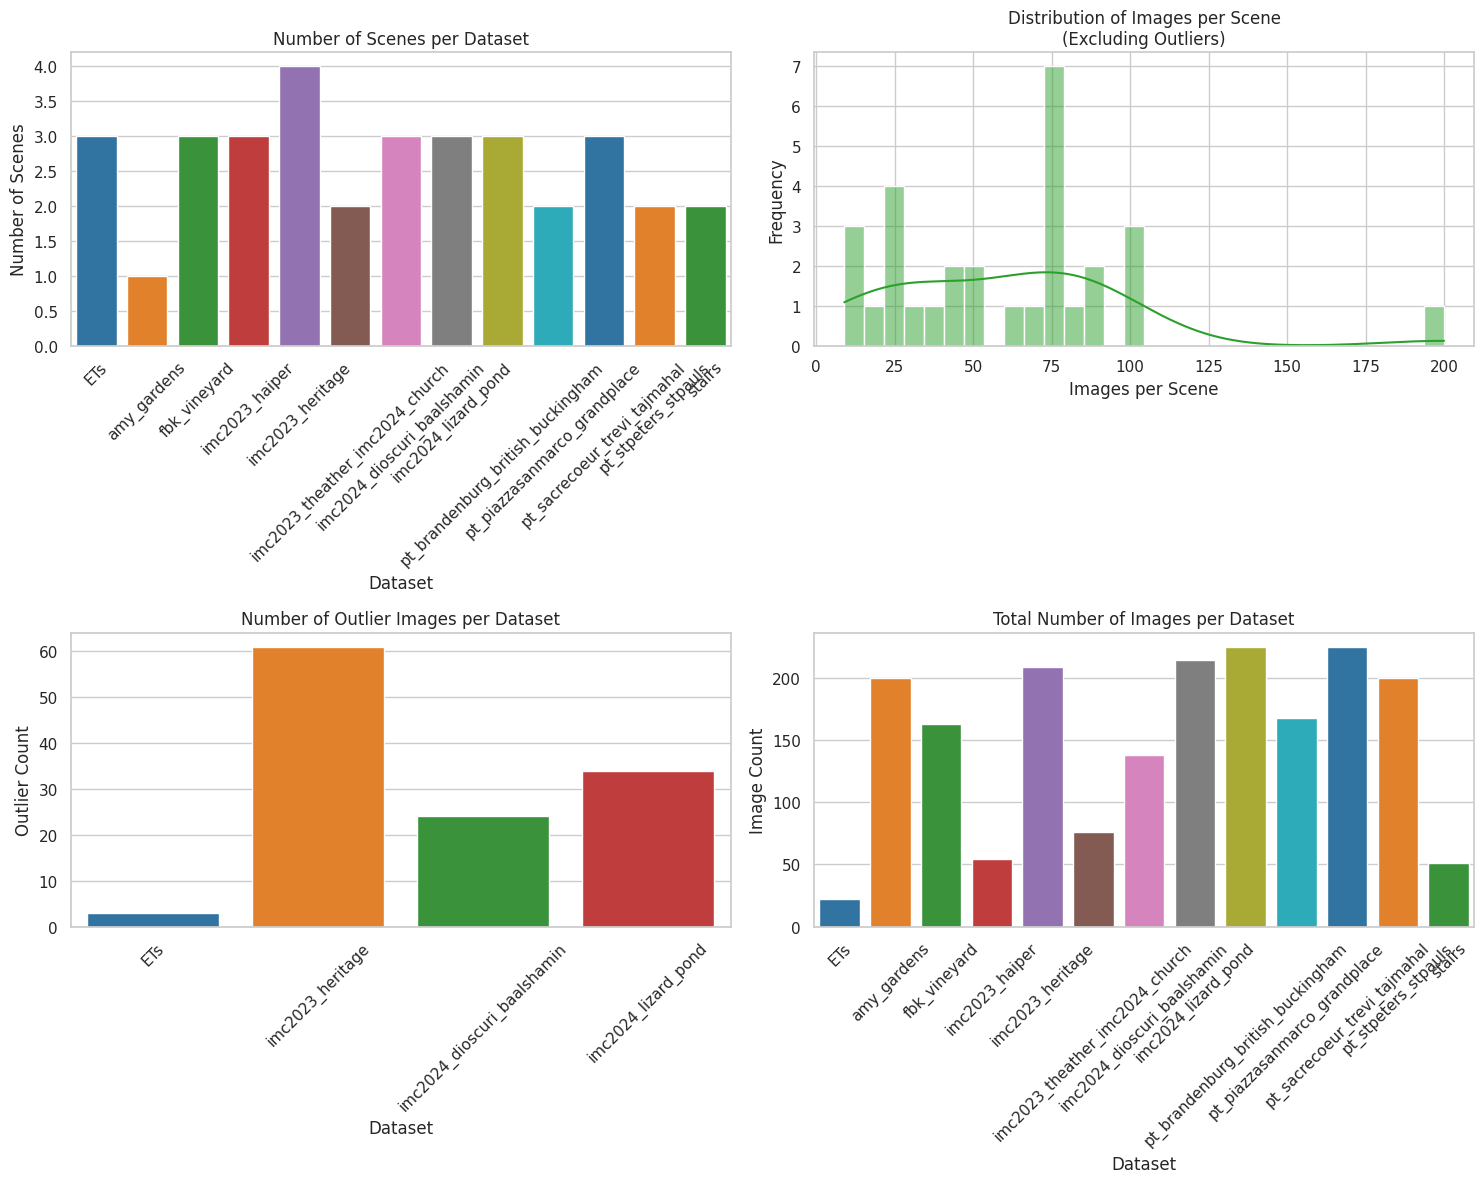

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style and define a color palette
sns.set(style='whitegrid')
palette = sns.color_palette("tab10")

# Calculate scenes per dataset
scenes_per_dataset = df.groupby('dataset')['scene'].nunique()

# Calculate images per scene (excluding outliers for distribution stats)
images_per_scene = (
    df[df['scene'] != 'outliers']
    .groupby(['dataset', 'scene'])
    .size()
    .reset_index(name='image_count')
)

# Outlier counts per dataset
outliers_per_dataset = df[df['scene'] == 'outliers'].groupby('dataset').size()

# Total images per dataset
images_per_dataset = df.groupby('dataset').size()

# Print stats
print("\n--- Scenes per Dataset (including 'outliers' as a scene) ---")
print(scenes_per_dataset)
print("\n--- Statistics on Images per Scene (excluding outliers) ---")
print(images_per_scene['image_count'].describe())
print("\n--- Outlier Images per Dataset ---")
print(outliers_per_dataset)
print("\n--- Total Images per Dataset ---")
print(images_per_dataset)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1) Scenes per dataset
sns.barplot(
    x=scenes_per_dataset.index,
    y=scenes_per_dataset.values,
    palette=palette,
    ax=axes[0, 0]
)
axes[0, 0].set_title('Number of Scenes per Dataset')
axes[0, 0].set_xlabel('Dataset')
axes[0, 0].set_ylabel('Number of Scenes')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2) Distribution of images per scene
sns.histplot(
    images_per_scene['image_count'],
    bins=30,
    kde=True,
    color=palette[2],
    ax=axes[0, 1]
)
axes[0, 1].set_title('Distribution of Images per Scene\n(Excluding Outliers)')
axes[0, 1].set_xlabel('Images per Scene')
axes[0, 1].set_ylabel('Frequency')

# 3) Outlier images per dataset
if not outliers_per_dataset.empty:
    sns.barplot(
        x=outliers_per_dataset.index,
        y=outliers_per_dataset.values,
        palette=palette,
        ax=axes[1, 0]
    )
    axes[1, 0].set_title('Number of Outlier Images per Dataset')
    axes[1, 0].set_xlabel('Dataset')
    axes[1, 0].set_ylabel('Outlier Count')
    axes[1, 0].tick_params(axis='x', rotation=45)
else:
    axes[1, 0].text(
        0.5, 0.5, 'No Outliers Found',
        ha='center', va='center', fontsize=14
    )
    axes[1, 0].set_title('Outlier Images per Dataset')
    axes[1, 0].axis('off')

# 4) Total images per dataset
sns.barplot(
    x=images_per_dataset.index,
    y=images_per_dataset.values,
    palette=palette,
    ax=axes[1, 1]
)
axes[1, 1].set_title('Total Number of Images per Dataset')
axes[1, 1].set_xlabel('Dataset')
axes[1, 1].set_ylabel('Image Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [4]:
# Prepare the data for sunburst plot
sunburst_df = df.groupby(['dataset', 'scene']).size().reset_index(name='count')

# Create a custom color scale for better differentiation between datasets
# Using a color sequence that provides good contrast between adjacent segments
color_sequence = px.colors.qualitative.Bold + px.colors.qualitative.Pastel + px.colors.qualitative.Vivid

# Create enhanced sunburst chart with better color mapping and hover information
fig = px.sunburst(
    sunburst_df,
    path=['dataset', 'scene'],
    values='count',
    color='dataset',
    color_discrete_sequence=color_sequence,
    title={
        'text': 'Dataset and Scene Hierarchy Visualization',
        'font': {'size': 24, 'family': 'Arial', 'color': '#333333'}
    },
    hover_data=['count']
)

# Customize layout
fig.update_layout(
    margin=dict(t=60, l=0, r=0, b=10),
    paper_bgcolor='#f8f9fa',
    plot_bgcolor='#f8f9fa',
    font=dict(family='Arial', size=14),
    hoverlabel=dict(bgcolor='white', font_size=14)
)

# Add annotations explaining the visualization
fig.add_annotation(
    text=f"Total datasets: {sunburst_df['dataset'].nunique()} | Total scenes: {sunburst_df['scene'].nunique()} | Total images: {sunburst_df['count'].sum()}",
    xref="paper", yref="paper",
    x=0.5, y=-0.05,
    showarrow=False,
    font=dict(size=14, color="#555"),
    bgcolor="#f0f0f0",
    bordercolor="#d0d0d0",
    borderwidth=1,
    borderpad=4,
    opacity=0.8
)

fig.show()

ValueError: 
    Invalid value of type 'builtins.dict' received for the 'text' property of layout.title
        Received value: {'text': 'Dataset and Scene Hierarchy Visualization', 'font': {'size': 24, 'family': 'Arial', 'color': '#333333'}}

    The 'text' property is a string and must be specified as:
      - A string
      - A number that will be converted to a string

Scenes in imc2024_lizard_pond: ['lizard' 'outliers' 'pond']


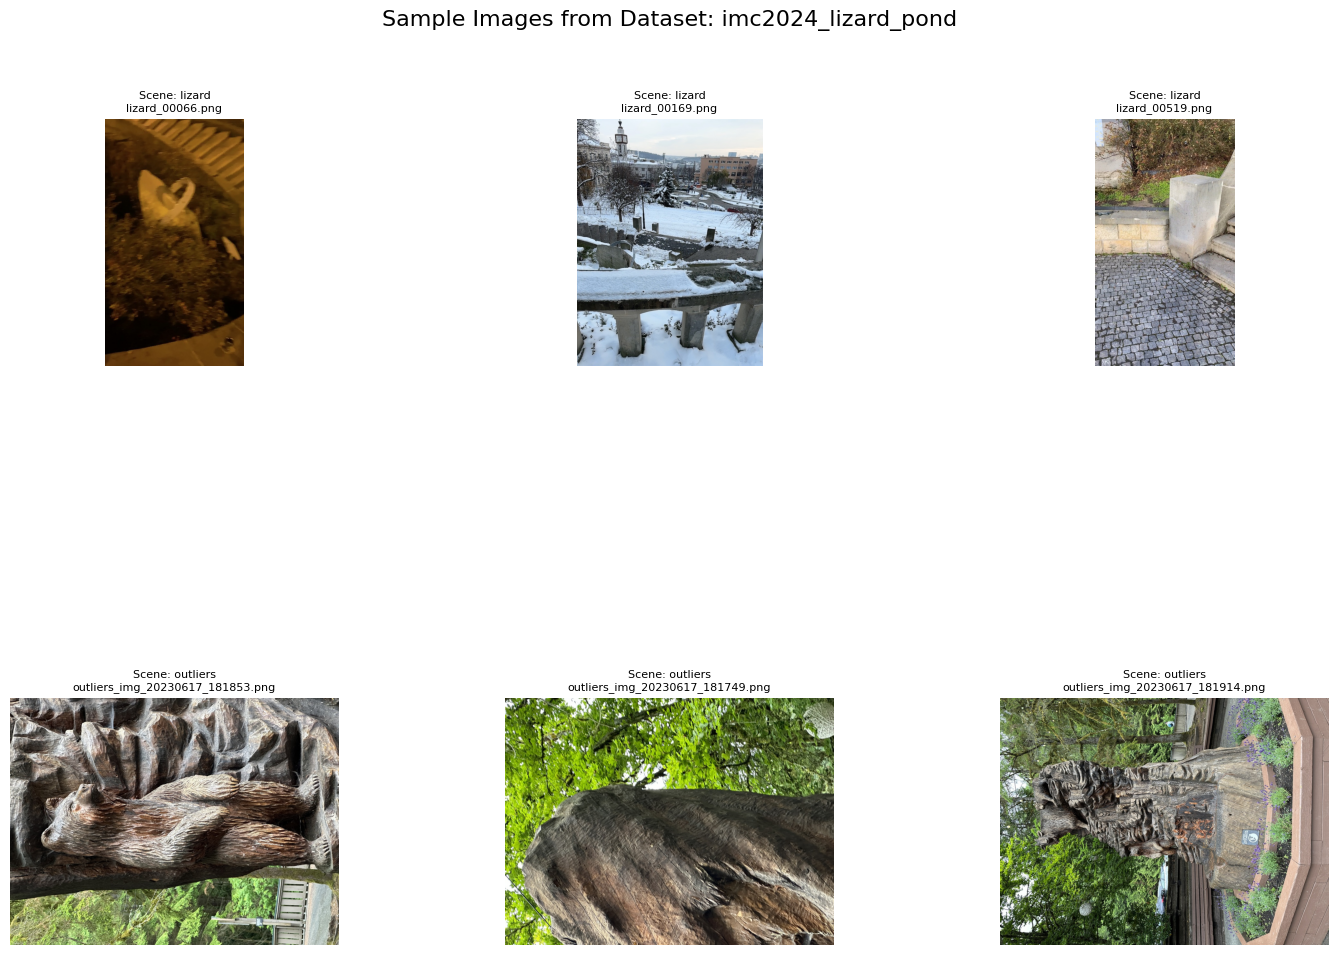

In [ ]:
def display_dataset_samples(dataset_name, n_scenes_to_show=2, n_samples_per_scene=3):
    dataset_labels = df[df['dataset'] == dataset_name]
    scenes = dataset_labels['scene'].unique()
    print(f"Scenes in {dataset_name}: {scenes}")

    # Set a modern style with a nice background
    plt.style.use('seaborn-v0_8-whitegrid')
    fig = plt.figure(figsize=(15, 5 * n_scenes_to_show), facecolor='#f0f0f5')
    
    # Generate vibrant colors for scene boxes
    scene_colors = plt.cm.tab10(np.linspace(0, 1, len(scenes)))
    
    plot_idx = 1

    # Show samples from regular scenes
    regular_scenes = [s for s in scenes if s != 'outliers'][:n_scenes_to_show]
    for i, scene in enumerate(regular_scenes):
        scene_images = dataset_labels[dataset_labels['scene'] == scene]['image'].sample(min(n_samples_per_scene, len(dataset_labels[dataset_labels['scene'] == scene]))).tolist()
        for img_name in scene_images:
            img_path = TRAIN_DIR / dataset_name / img_name
            if img_path.exists():
                img = cv2.imread(str(img_path))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                ax = plt.subplot(n_scenes_to_show + 1, n_samples_per_scene, plot_idx) # +1 for outliers row
                ax.imshow(img)
                
                # Add decorative frame with scene color
                for spine in ax.spines.values():
                    spine.set_linewidth(3)
                    spine.set_color(scene_colors[i])
                    
                ax.set_title(f"Scene: {scene}\n{img_name}", fontsize=9, fontweight='bold', color='#333333')
                ax.axis('off')
            plot_idx += 1
        # Fill remaining plots in the row if fewer samples found
        plot_idx = ( (plot_idx -1) // n_samples_per_scene + 1) * n_samples_per_scene + 1


    # Show samples from outliers if they exist
    if 'outliers' in scenes:
         outlier_images = dataset_labels[dataset_labels['scene'] == 'outliers']['image'].sample(min(n_samples_per_scene, len(dataset_labels[dataset_labels['scene'] == 'outliers']))).tolist()
         # Adjust starting plot index for outlier row
         plot_idx = n_scenes_to_show * n_samples_per_scene + 1
         color_idx = len(regular_scenes) % len(scene_colors)  # Get next color for outliers
         
         for img_name in outlier_images:
             img_path = TRAIN_DIR / dataset_name / 'outliers' / img_name # Check specific outlier folder if structure dictates
             # Fallback to main folder if outlier folder doesn't exist or image isn't there
             if not img_path.exists():
                 img_path = TRAIN_DIR / dataset_name / img_name

             if img_path.exists():
                 img = cv2.imread(str(img_path))
                 img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                 ax = plt.subplot(n_scenes_to_show + 1, n_samples_per_scene, plot_idx)
                 ax.imshow(img)
                 
                 # Add decorative frame with distinctive color for outliers
                 for spine in ax.spines.values():
                    spine.set_linewidth(3)
                    spine.set_color('crimson')  # Distinctive color for outliers
                 
                 ax.set_title(f"Scene: outliers\n{img_name}", fontsize=9, fontweight='bold', color='#333333')
                 ax.axis('off')
             plot_idx += 1

    # Add dataset information header
    plt.suptitle(f"Sample Images from Dataset: {dataset_name}", fontsize=18, fontweight='bold', color='#222222')
    plt.figtext(0.5, 0.01, f"Total images in {dataset_name}: {len(dataset_labels)}", ha='center', 
                fontsize=12, bbox={"facecolor":"#e0e0e0", "alpha":0.8, "pad":5, "boxstyle":"round"})
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

# Display samples from a dataset known to have multiple scenes/outliers
if not df.empty:
    example_dataset = 'imc2024_lizard_pond' # Choose a dataset from EDA
    if example_dataset in df['dataset'].unique():
         display_dataset_samples(example_dataset)
    else:
        print(f"Example dataset '{example_dataset}' not found in labels. Choose another.")
        if len(datasets_train)>0:
             display_dataset_samples(datasets_train[0]) # Show first dataset if example not found
else:
    print("Skipping visualization as training labels are not loaded.")